In [1]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import nutpie

# Ch 13

In [2]:
data = np.array([5])
alpha_0 = 2.1
beta_0 = 1

In [3]:
with pm.Model() as sharks_model:
  lambda_ = pm.Gamma("lambda", alpha_0, beta_0)
  observation = pm.Poisson("obs", lambda_, observed=data)

  step = pm.Metropolis()
  trace = pm.sample(25000, tune=5000, step=step, chains=1)

Sequential sampling (1 chains in 1 job)
Metropolis: [lambda]


Output()

Sampling 1 chain for 5_000 tune and 25_000 draw iterations (5_000 + 25_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


[]

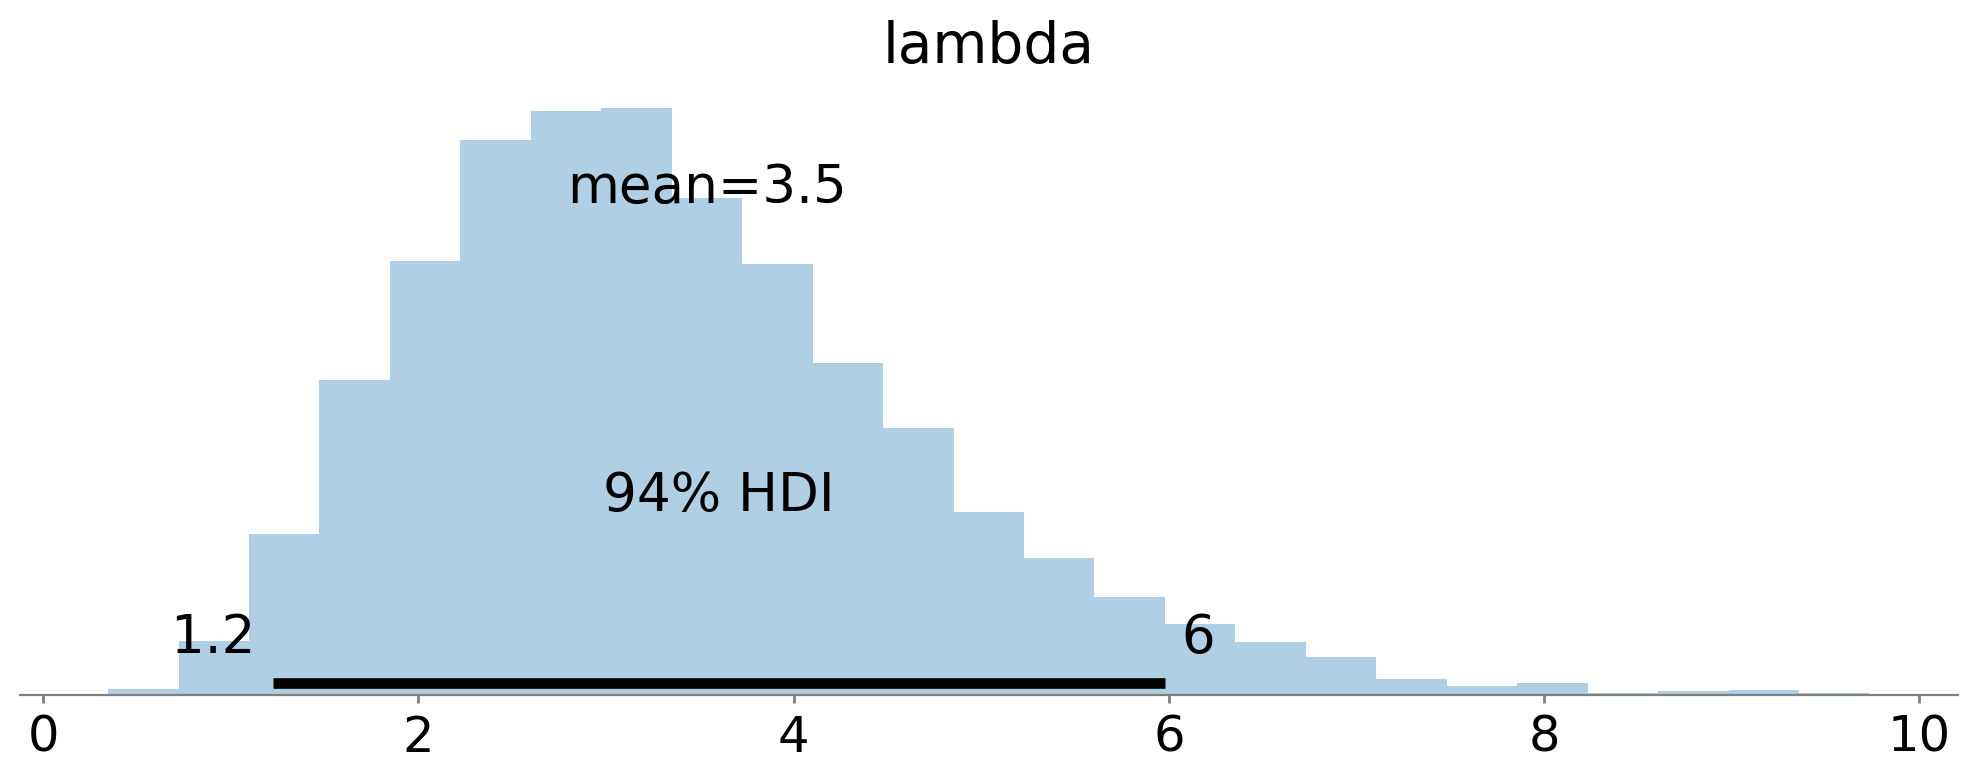

In [4]:
%config InlineBackend.figure_format = 'retina'

ax = az.plot_posterior(trace, var_names=['lambda'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

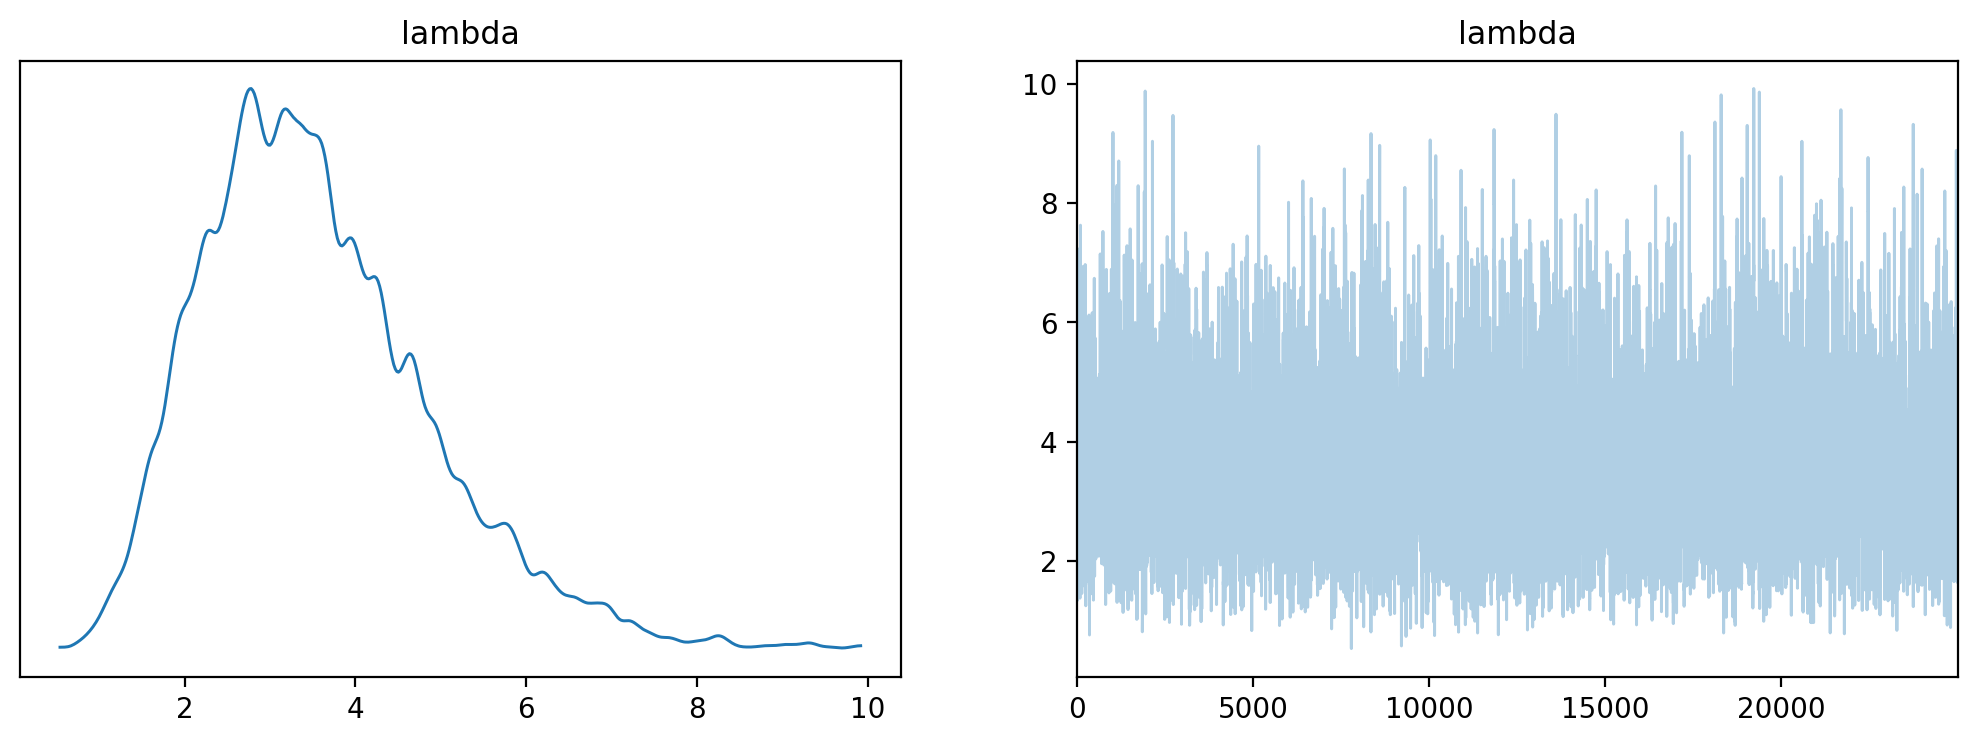

In [5]:
az.plot_trace(trace, figsize=(12.5, 4))
plt.show()

In [6]:
az.summary(trace)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda,3.541,1.328,1.223,5.978,0.018,0.013,5422.0,6141.0,NaN


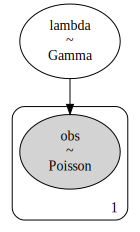

In [7]:
graphviz = pm.model_to_graphviz(sharks_model)
graphviz

# Ch 15

In [8]:
alpha_0 = 0.5
beta_0 = 0.5
data = np.array([0])
tuning_beta = 3.

In [9]:
# from pymc.step_methods.metropolis import Proposal
# class BetaProposal(Proposal):
#     def __init__(self, alpha, beta):
#         self.alpha = alpha
#         self.beta = beta

#     def __call__(self, random_state=None):
#         return np.random.beta(self.alpha, self.beta, size=1)

In [10]:
# with pm.Model() as white_house_model:
#     theta = pm.Beta("theta", alpha_0, beta_0)
#     observation = pm.Bernoulli("obs", theta, observed=data)

#     alpha_ = (tuning_beta * theta.eval()) / (-theta.eval() + 1)
#     step = pm.Metropolis(prop_dist=BetaProposal(alpha_, tuning_beta))
#     trace = pm.sample(25000, tune=5000, step=step, chains=1)

In [11]:
with pm.Model() as white_house_model:
    theta = pm.Beta("theta", alpha_0, beta_0)
    observation = pm.Bernoulli("obs", theta, observed=data)

    step = pm.Metropolis()
    trace = pm.sample(25000, tune=5000, step=step, chains=1)

Sequential sampling (1 chains in 1 job)
Metropolis: [theta]


Output()

Sampling 1 chain for 5_000 tune and 25_000 draw iterations (5_000 + 25_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


[]

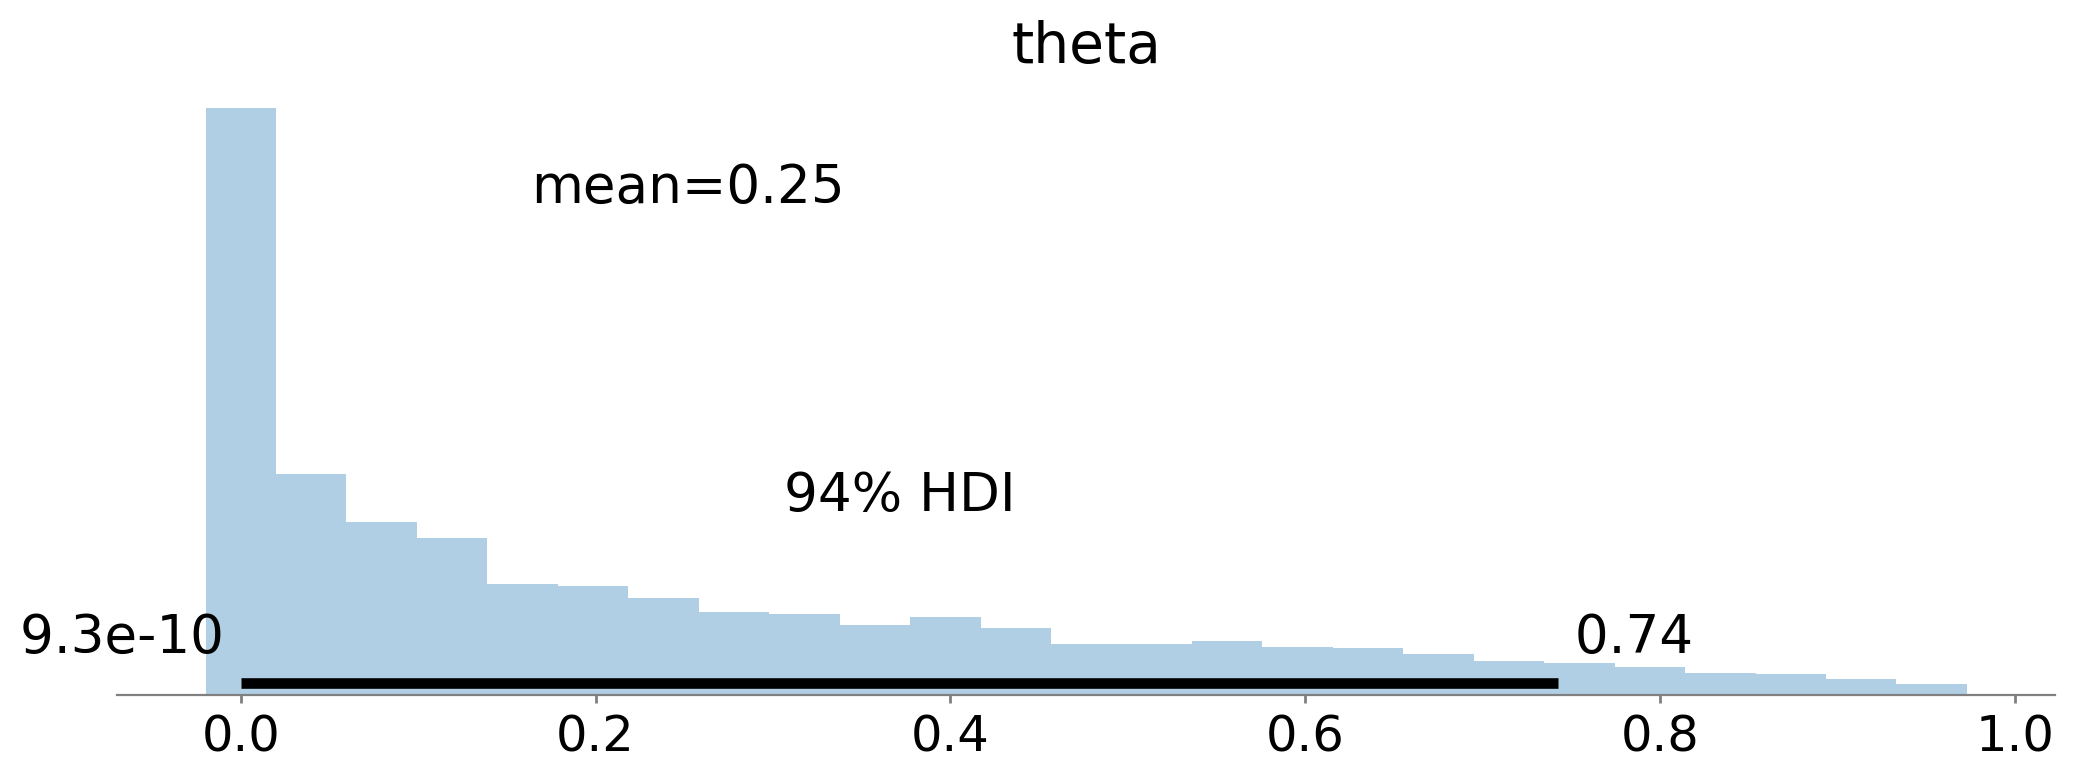

In [12]:
%config InlineBackend.figure_format = 'retina'

ax=az.plot_posterior(trace, var_names=['theta'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

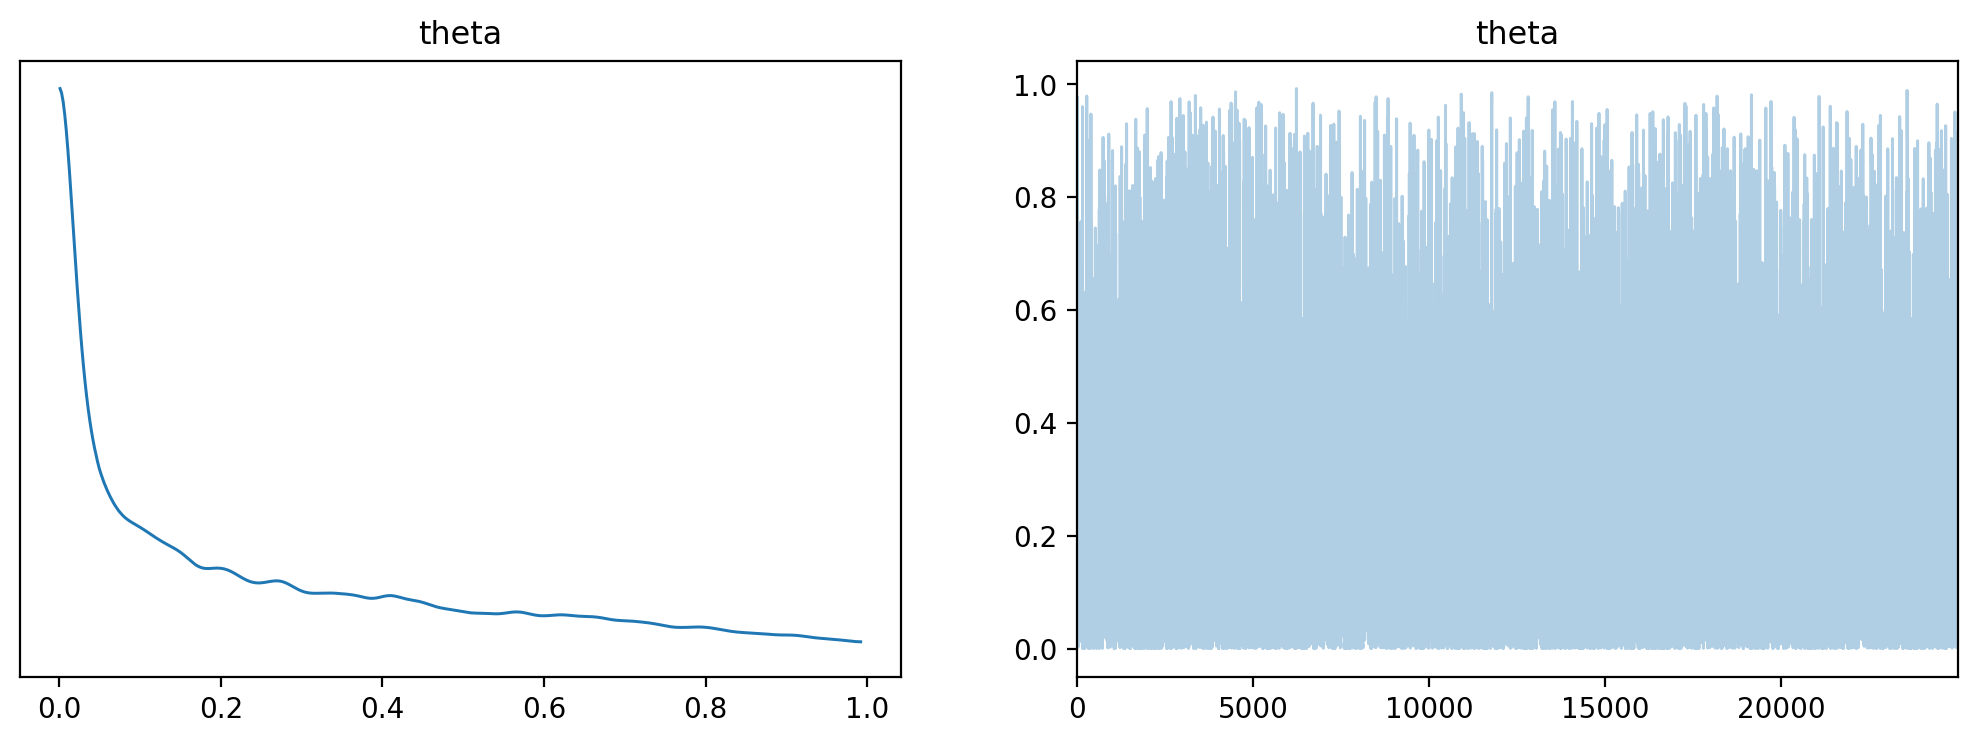

In [13]:
az.plot_trace(trace, figsize=(12.5, 4))
plt.show()

In [14]:
az.summary(trace)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.252,0.252,0.0,0.742,0.003,0.002,5153.0,4580.0,NaN


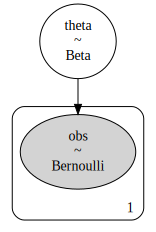

In [15]:
graphviz = pm.model_to_graphviz(white_house_model)
graphviz

# Ch 16

In [16]:
mu_0 = 12
tau_0 = 0.0625
alpha_0 = 25
beta_0 = 0.5
data = np.array([10.2])

In [17]:
with pm.Model() as maple_model:
    mu = pm.Normal("mu", mu=mu_0, tau=tau_0)
    tau = pm.Gamma("tau", alpha=alpha_0, beta=beta_0)
    observation = pm.Normal("obs", mu=mu, tau=tau, observed=data)

    trace = pm.sample(25000, tune=5000, chains=1, nuts_sampler="nutpie") # nutpie, blackjax, numpyro

Progress,Draws,Divergences,Step Size,Gradients/Draw
,30000,0,1.18,3


[]

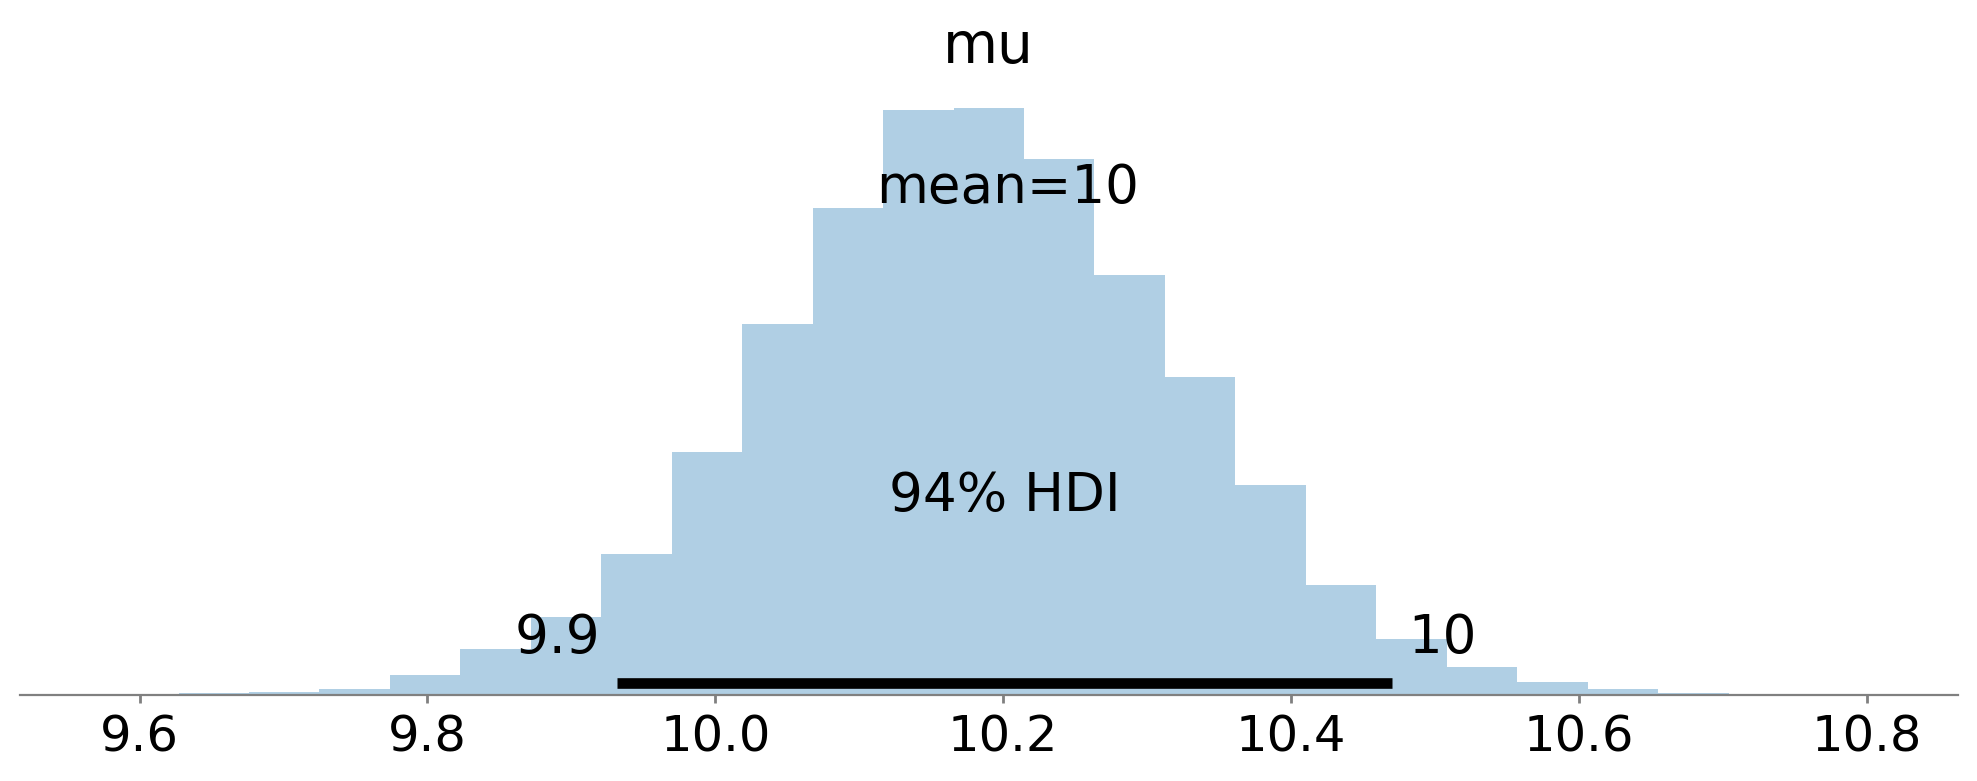

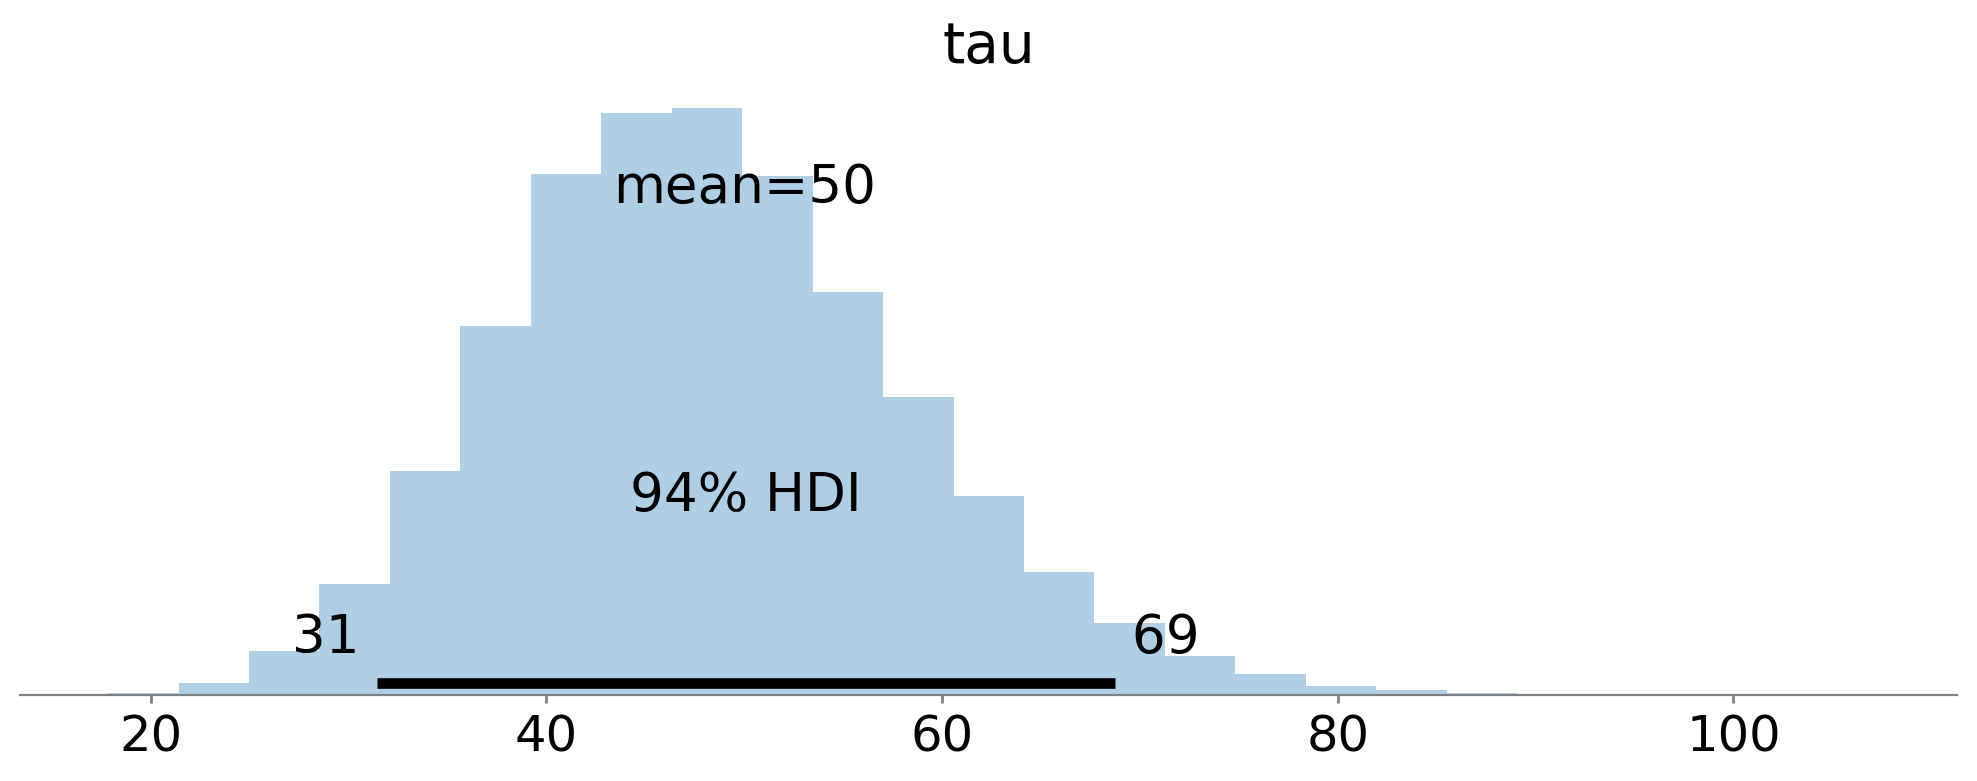

In [18]:
%config InlineBackend.figure_format = 'retina'

ax=az.plot_posterior(trace, var_names=['mu'], kind='hist', bins=25, figsize=(12.5,4))
ax=az.plot_posterior(trace, var_names=['tau'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

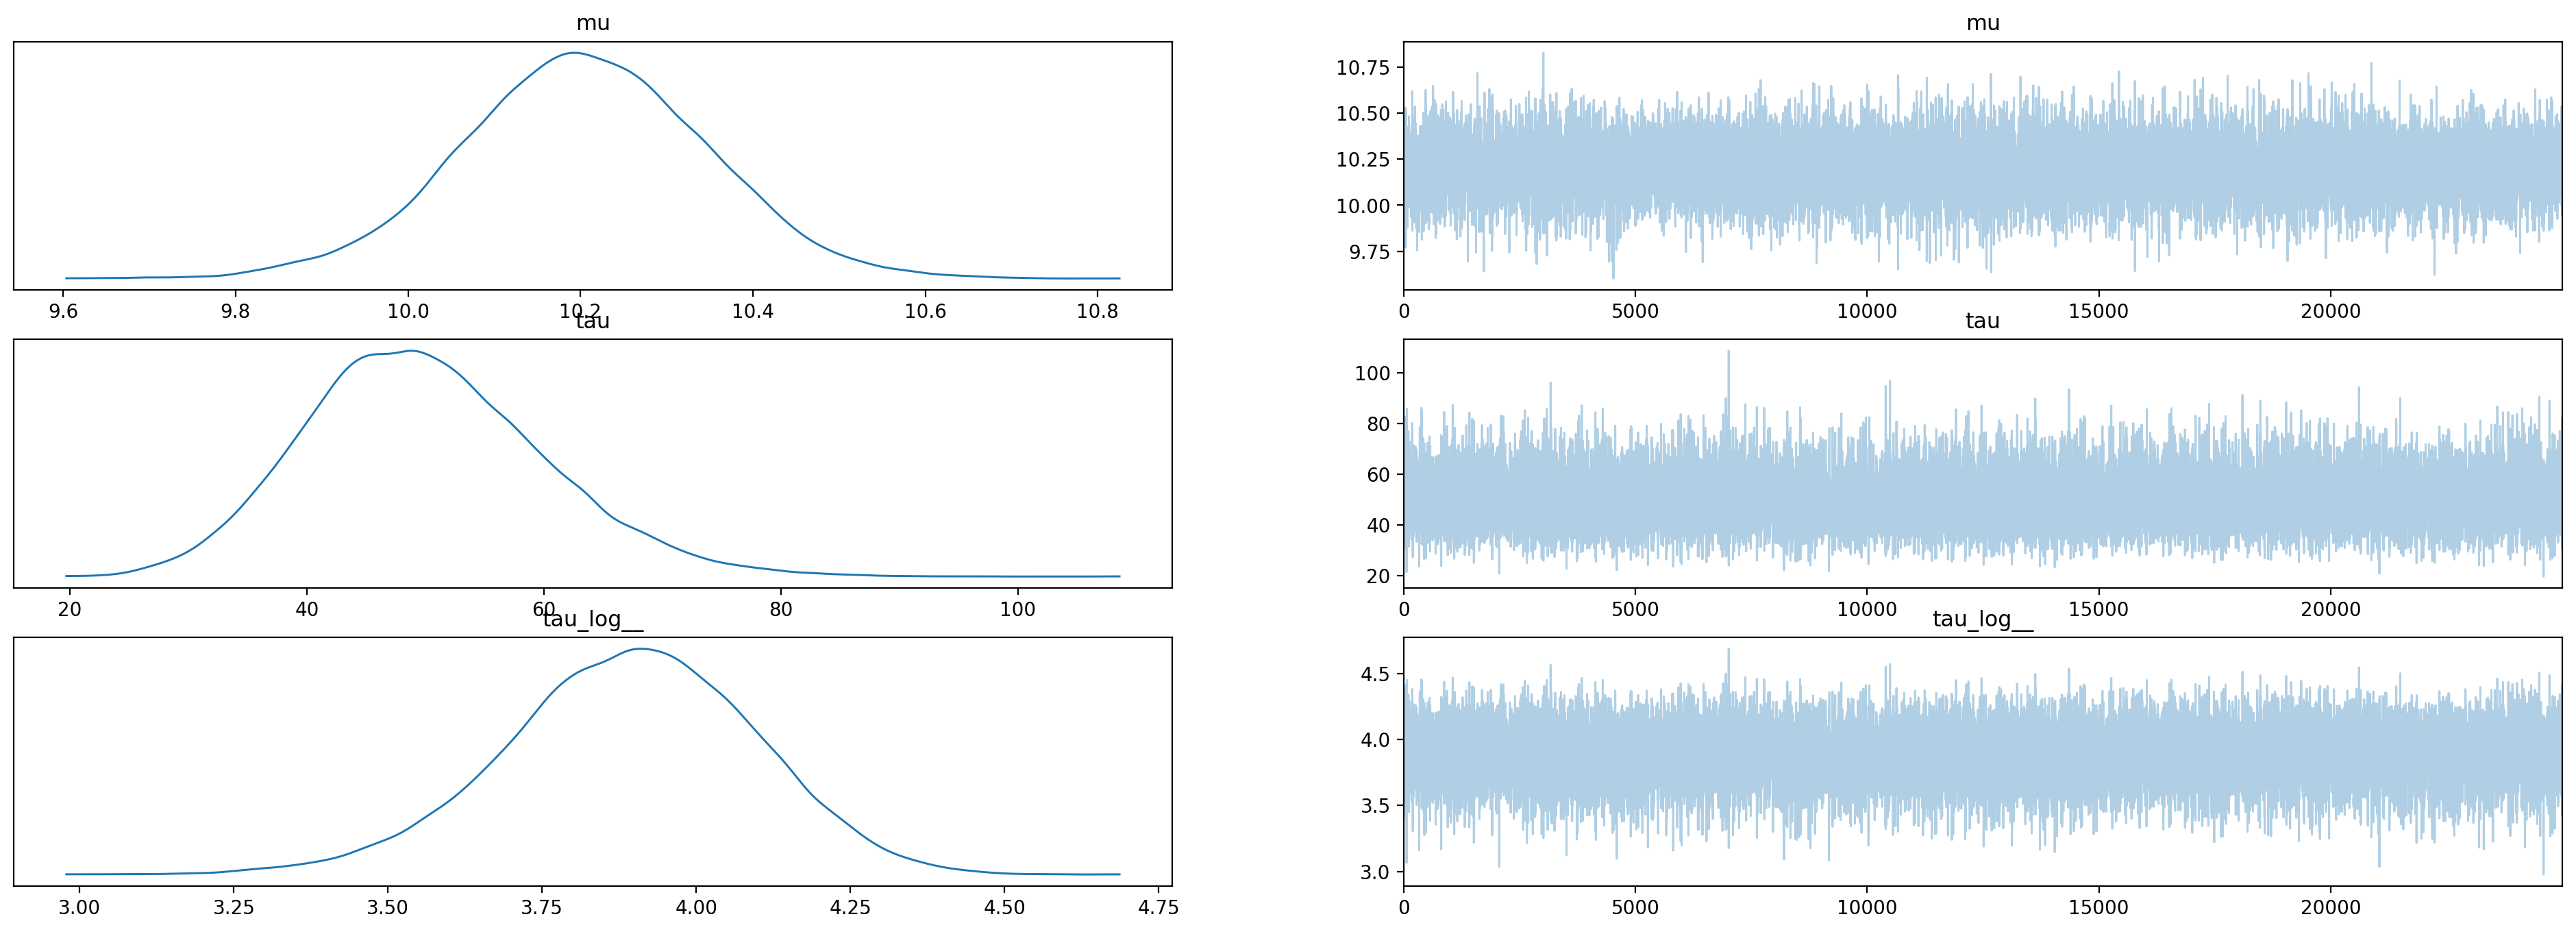

In [19]:
az.plot_trace(trace, figsize=(24, 8))
plt.show()

In [20]:
az.summary(trace)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,10.203,0.143,9.932,10.470,0.001,0.001,24749.0,17833.0,NaN
tau,49.990,10.031,31.415,68.752,0.063,0.045,25546.0,17814.0,NaN
tau_log__,3.892,0.203,3.517,4.279,0.001,0.001,25546.0,17814.0,NaN


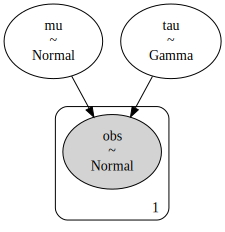

In [21]:
graphviz = pm.model_to_graphviz(maple_model)
graphviz

## Use nutpie to compile pymc model

In [22]:
with pm.Model() as maple_model:
    mu = pm.Normal("mu", mu=mu_0, tau=tau_0)
    tau = pm.Gamma("tau", alpha=alpha_0, beta=beta_0)
    observation = pm.Normal("obs", mu=mu, tau=tau, observed=data)

compiled_maple_model = nutpie.compile_pymc_model(maple_model)
trace = nutpie.sample(compiled_maple_model, draws=25000, tune=5000, chains=1)

Progress,Draws,Divergences,Step Size,Gradients/Draw
,30000,0,1.19,1


[]

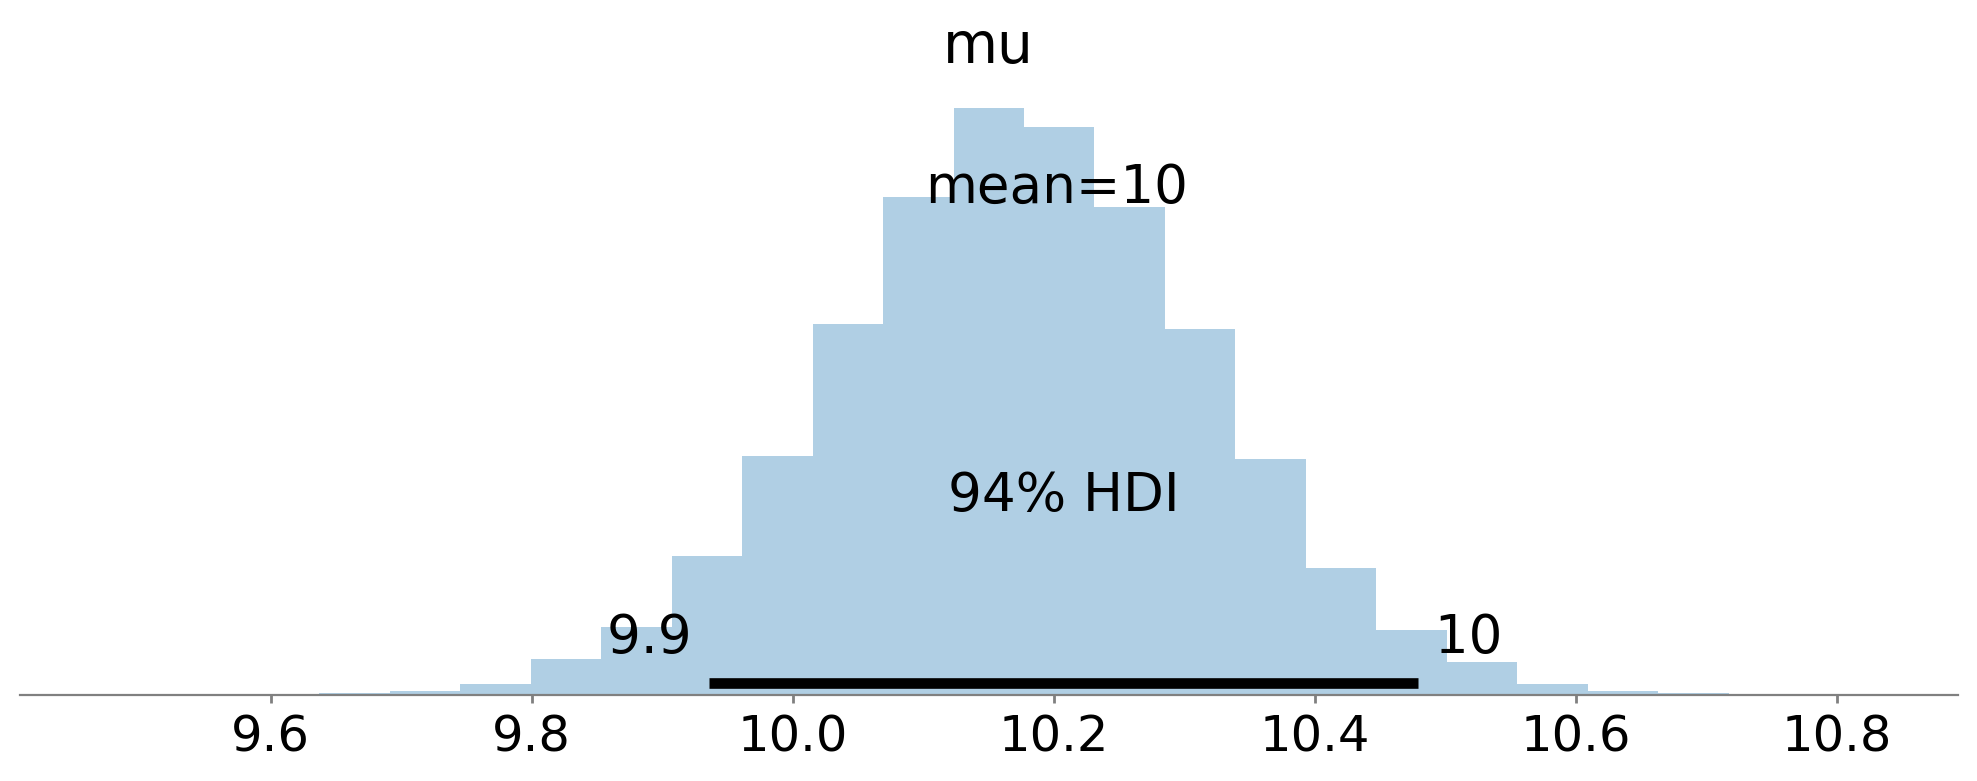

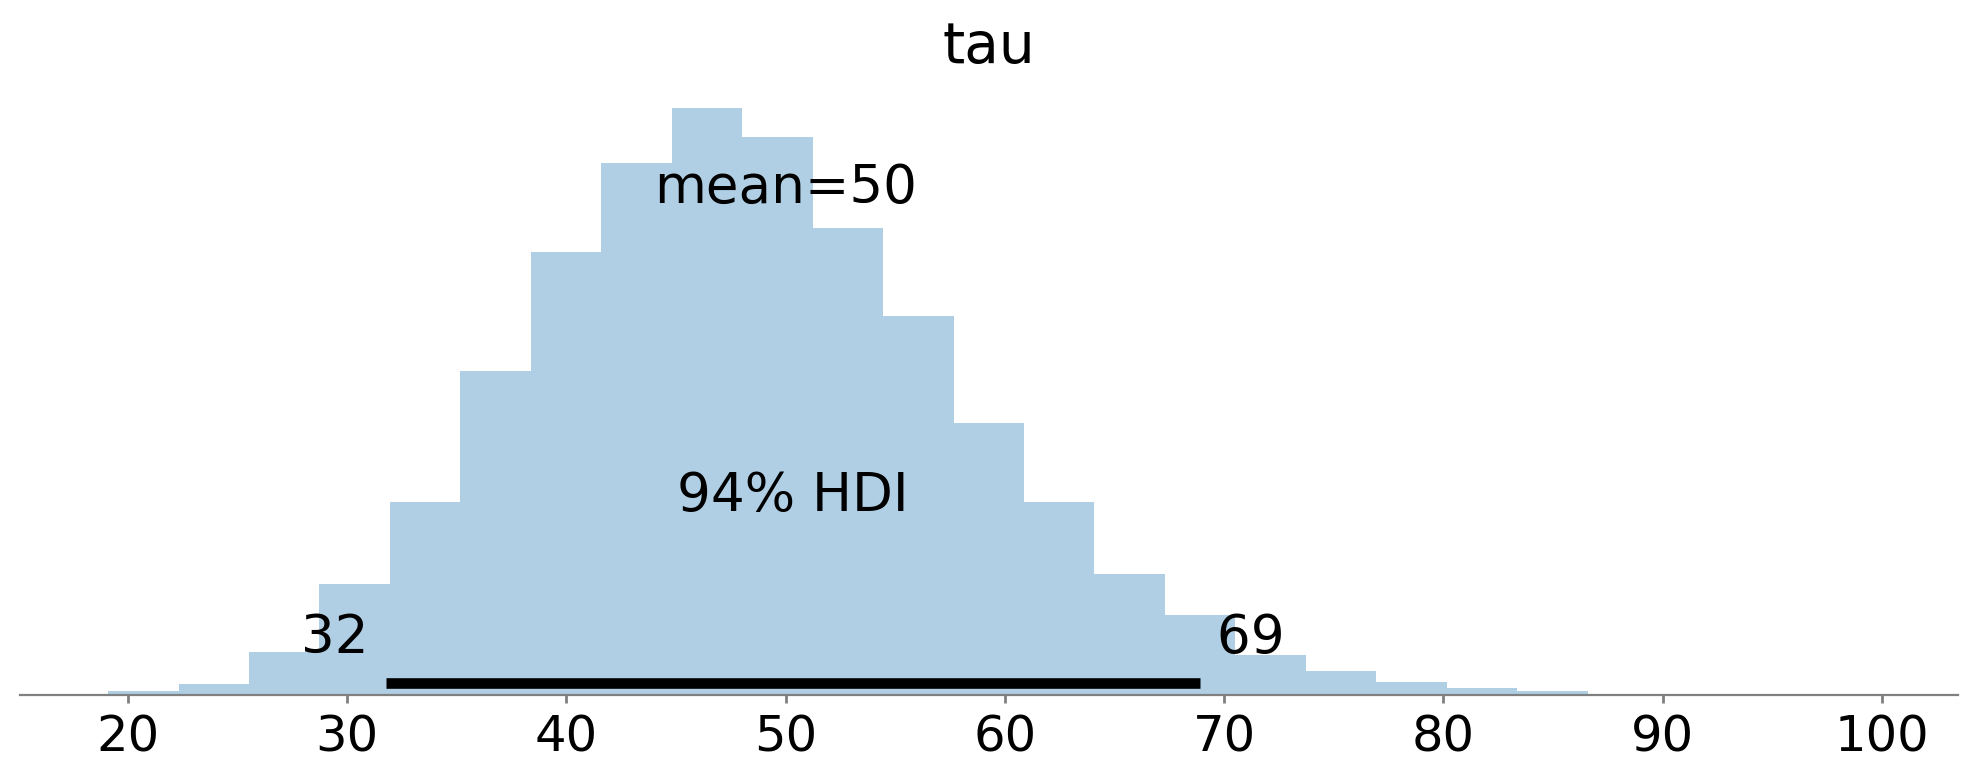

In [23]:
%config InlineBackend.figure_format = 'retina'

ax=az.plot_posterior(trace, var_names=['mu'], kind='hist', bins=25, figsize=(12.5,4))
ax=az.plot_posterior(trace, var_names=['tau'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

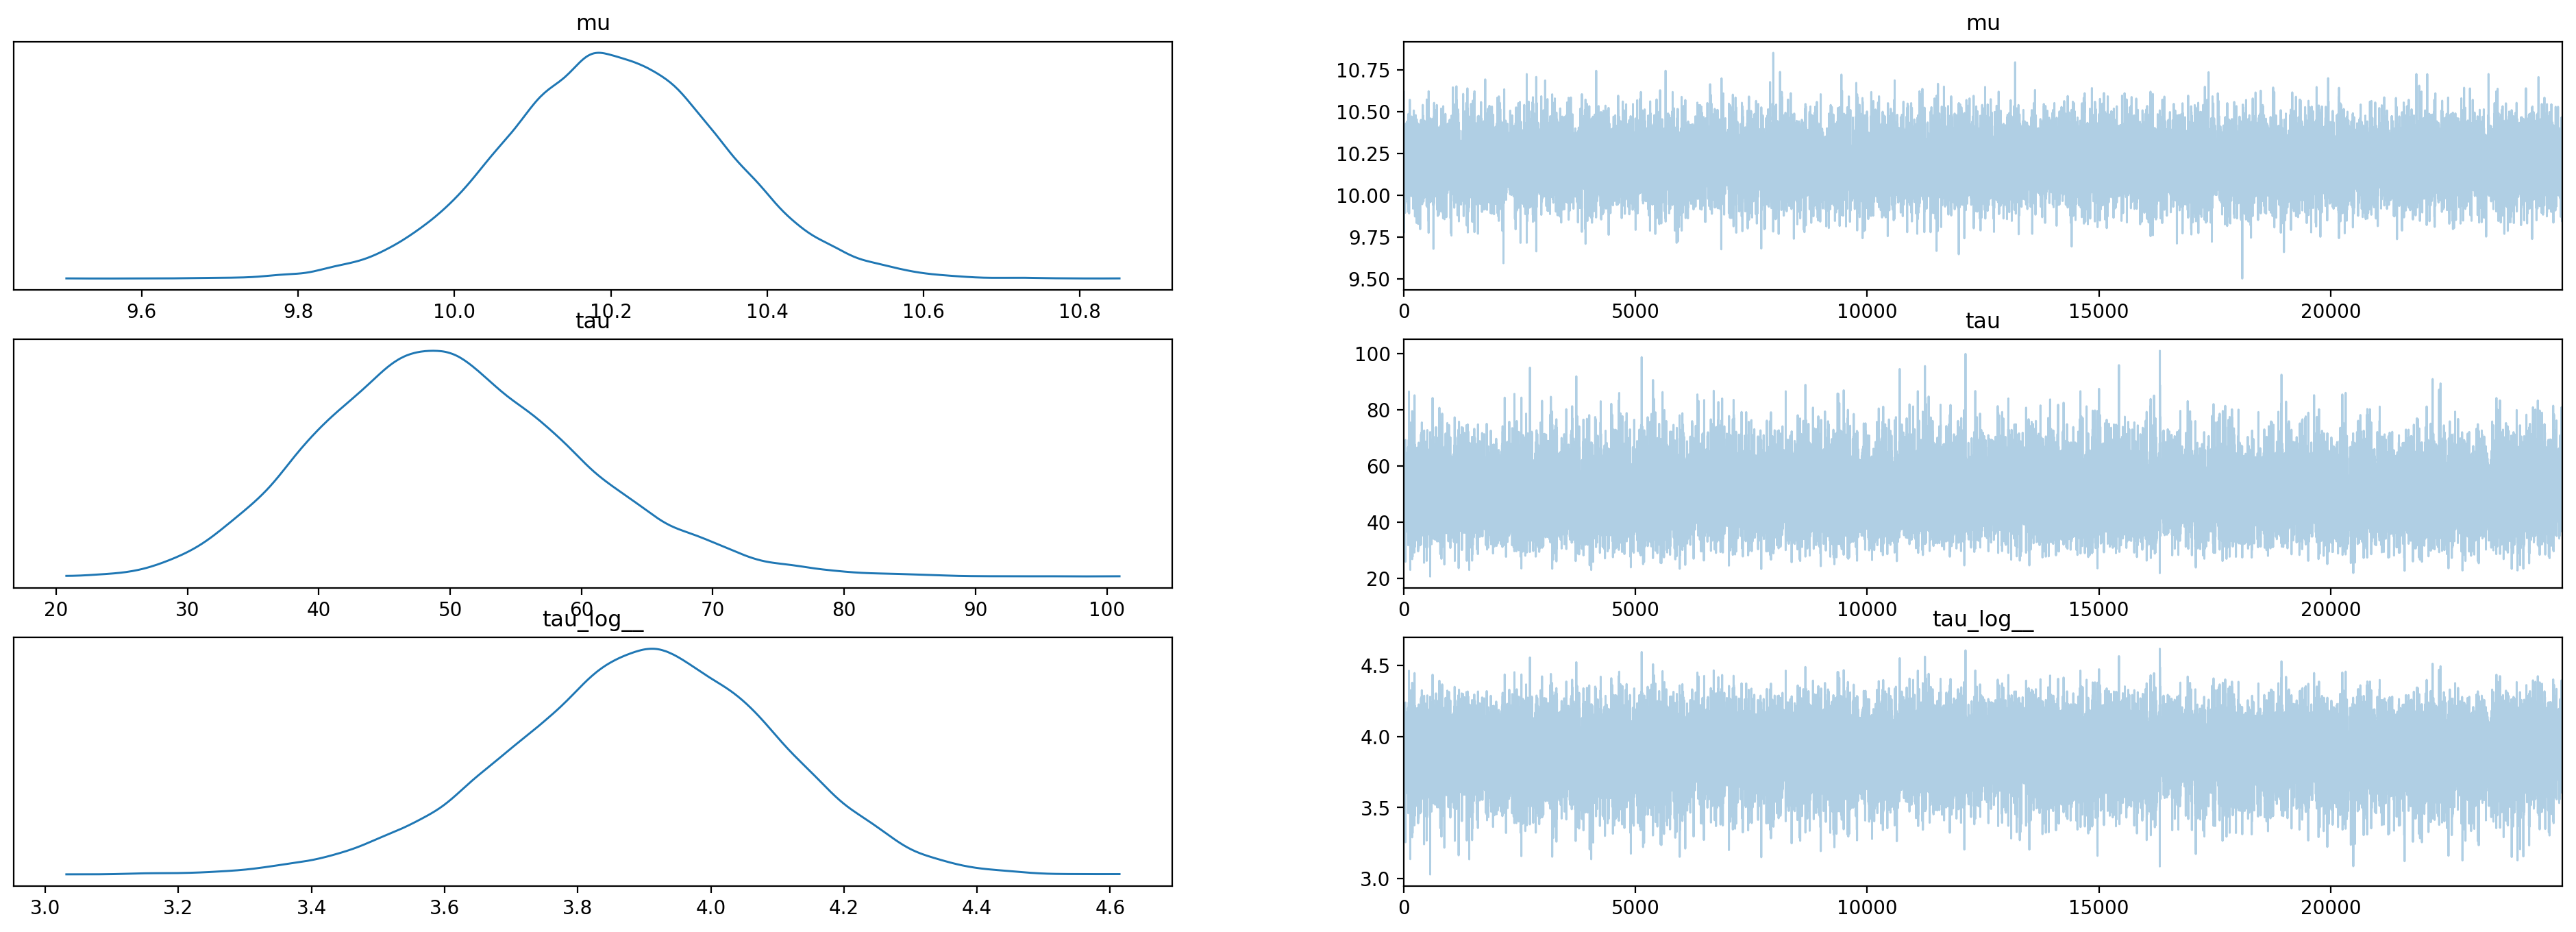

In [24]:
az.plot_trace(trace, figsize=(24, 8))
plt.show()

In [25]:
az.summary(trace)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,10.202,0.144,9.936,10.479,0.001,0.001,23866.0,17082.0,NaN
tau,49.992,9.966,31.767,68.886,0.064,0.046,24600.0,17240.0,NaN
tau_log__,3.892,0.202,3.501,4.258,0.001,0.001,24600.0,17240.0,NaN
